In [480]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from math import log, sqrt, exp, pow
from IPython.display import display, Markdown, Latex, Image, SVG

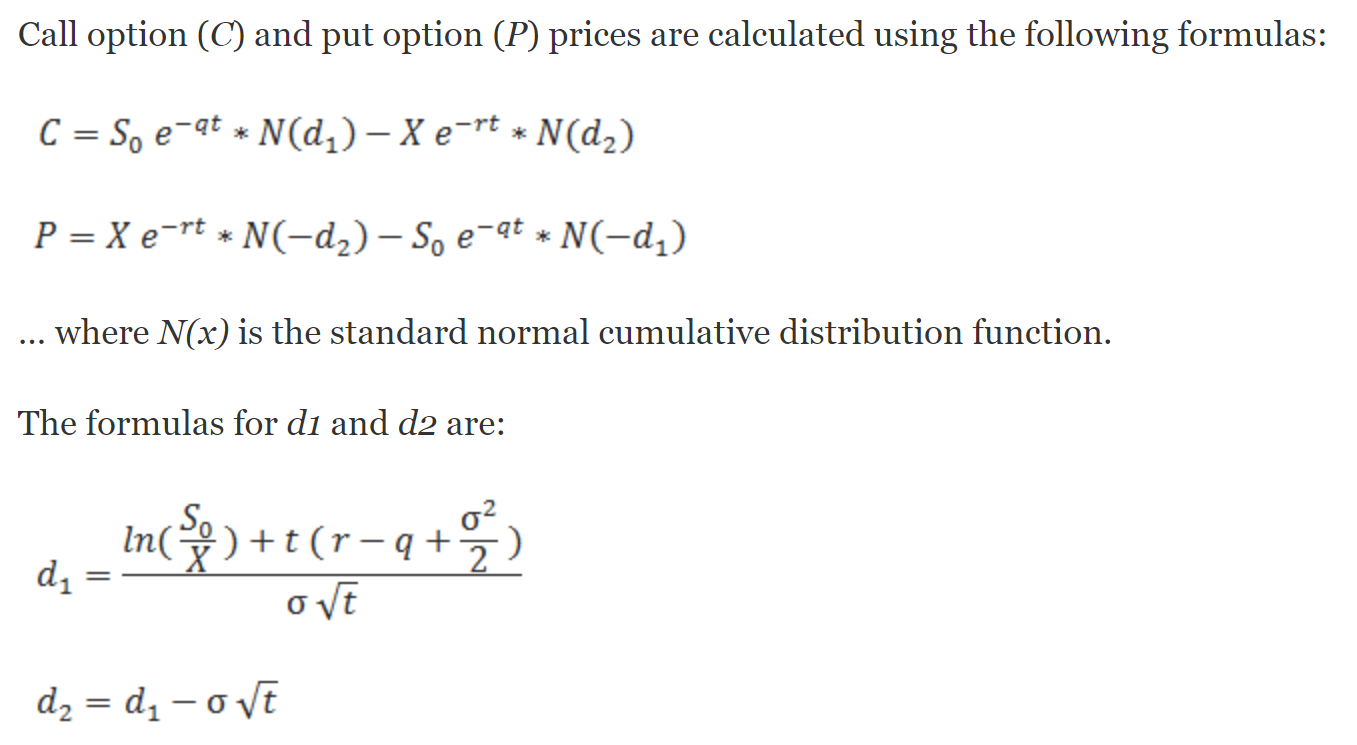

In [481]:
#Markdown(stats.norm.__doc__)
Image('BSformula.PNG',width=500,height=500)

In [482]:
def BSM(S=100, E=100, T=0.25, r=0.02, q=0.03, sigma=0.2):
    
    '''
    Calculate option pricing using Black Scholes
    https://www.macroption.com/black-scholes-formula/
    
    S = current spot price
    E = strike price
    T = time to maturity expressed as fraction of days per year
    r = annual risk free rate
    q = annual dividend yield
    sigma = annual volatility
    '''
    
    d1 = (log(S/E)+T*(r-q+pow(sigma,2)/2)) / (sigma*sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    Callprice = S * exp(-q*T) * stats.norm.cdf(d1) - E * exp(-r*T) * stats.norm.cdf(d2)
    Putprice = E*exp(-r*T)*stats.norm.cdf(-d2)-S*exp(-q*T)*stats.norm.cdf(-d1)
    print("call price: %.4f" % Callprice)
    print("put price: %.4f" % Putprice)
    
    return Callprice
    
    #Callprice_cauchy = S * exp(-q*T) * cauchy.cdf(d1) - E * exp(-r*T) * cauchy.cdf(d2)
    #Putprice_cauchy = E*exp(-r*T)*cauchy.cdf(-d2)-S*exp(-q*T)*cauchy.cdf(-d1)
    # print("call_cauchy price: %.4f" % Callprice_cauchy)
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html # cauchy
    # print("put_cauchy price: %.4f" % Putprice_cauchy)

#parameters

S=100 # spot price
E=100 # strike price
T=0.25 #T=30/360 # time to expiration
r=0.02 # risk free rate
sigma=0.2# volatility, or annual standard deviation
q = 0.03 # annual dividend yield

# full function
print(f'call price is {BSM(S, E, T, r, q, sigma)}')

call price: 3.8399
put price: 4.0884
call price is 3.839934576789126


In [483]:
# fig, ax = plt.subplots(1, 1,figsize=(10,5))
# mean, var, skew, kurt = stats.cauchy.stats(moments='mvsk')
# # x = np.linspace(cauchy.ppf(0.01),cauchy.ppf(0.99), 100)
# # ax.plot(x, cauchy.pdf(x),'r-', lw=5, alpha=0.6, label='cauchy pdf')
# x = np.linspace(-100,100,100)
# ax.plot(x, stats.cauchy.cdf(x),'r-', lw=2, alpha=0.2, label='cauchy c32020136df')
# ax.plot(x, norm.cdf(x),'b-', lw=2, alpha=0.2, label='normal cdf')
# ax.legend()

Use the Black-Scholes function in Question 1, implement the implied volatility function by
Bisection method. Here you first try to find two bounds that contain the root by starting with
0.0 and an increment of 20% until you find the two bounds which contain the root. Once you
have the two bounds, you can implement the bisection algorithm. Hint: You may use the
partial function to represent the Black-Scholes from Q1 so that the partial function is solely a
function of volatility. You can verify your function is correct by using question 1 answer to get
back the implied volatility of 0.2.

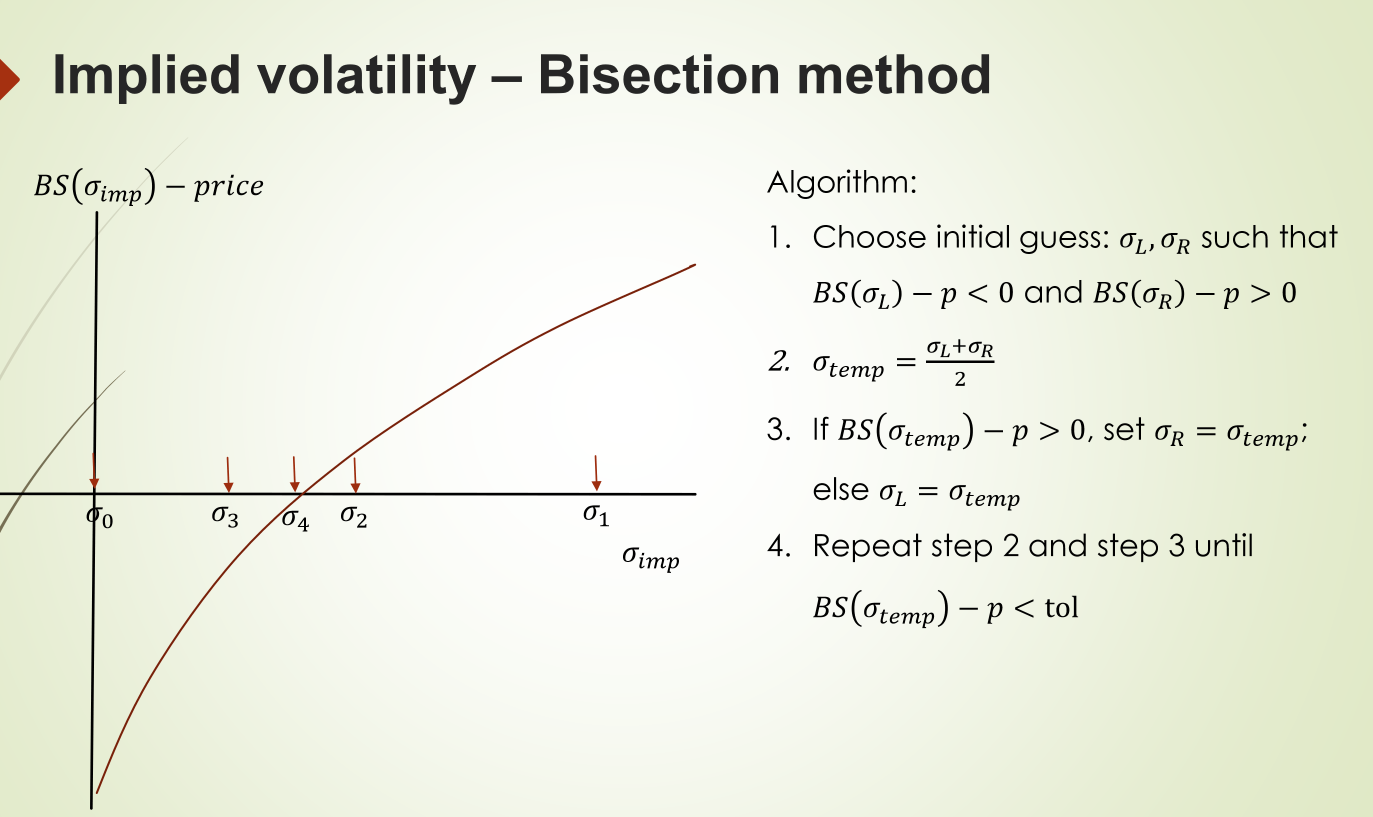

In [484]:
Image('bisection.PNG',width=500,height=500)

In [485]:
# define global variables
    
left = 0.001 # left bound of sigma
right = 0.001 # right bound of sigma
temp = 0.001 # initialize variable
price = 3.839934576789126 # call price
tol = 0.0000001
ctr = 0

def Bisection():
    global left
    global right
    global temp
    if BSM(sigma=temp)-price > 0:
        right = temp
    if BSM(sigma=temp)-price < 0:
        left = temp
    temp = 0.5*(left+right)
    
    
# step 1: initial guess from 0.1% annul vol to 500% annual vol
for right in np.arange(start=0.001,stop=5,step=0.2):
    if BSM(sigma=left)-price < 0 and BSM(sigma=right)-price > 0:
        # keep repeating step 2 and 3 until meets the tolerence level
        while abs(BSM(sigma=temp)-price) > tol:
            ctr += 1
            Bisection()
            print(temp)
            if ctr > 1000:
                break


call price: 0.0000
put price: 0.2484
call price: 0.0000
put price: 0.2484
call price: 0.0000
put price: 0.2484
call price: 3.8597
put price: 4.1082
call price: 0.0000
put price: 0.2484
call price: 0.0000
put price: 0.2484
call price: 0.0000
put price: 0.2484
0.101
call price: 1.8801
put price: 2.1286
call price: 1.8801
put price: 2.1286
call price: 1.8801
put price: 2.1286
0.15100000000000002
call price: 2.8700
put price: 3.1184
call price: 2.8700
put price: 3.1184
call price: 2.8700
put price: 3.1184
0.17600000000000002
call price: 3.3649
put price: 3.6133
call price: 3.3649
put price: 3.6133
call price: 3.3649
put price: 3.6133
0.1885
call price: 3.6123
put price: 3.8608
call price: 3.6123
put price: 3.8608
call price: 3.6123
put price: 3.8608
0.19475
call price: 3.7360
put price: 3.9845
call price: 3.7360
put price: 3.9845
call price: 3.7360
put price: 3.9845
0.19787500000000002
call price: 3.7979
put price: 4.0463
call price: 3.7979
put price: 4.0463
call price: 3.7979
put price: 4

Use the Black-Scholes function in Question 1, implement the implied volatility function by
Newton Raphson method. Here you first need to write the vega function. Hint: You may use
the partial function to represent the Black-Scholes from Q1 and the vega function solely a
function of volatility. You can verify your function is correct by using question 1 answer to get
back the implied volatility of 0.2.

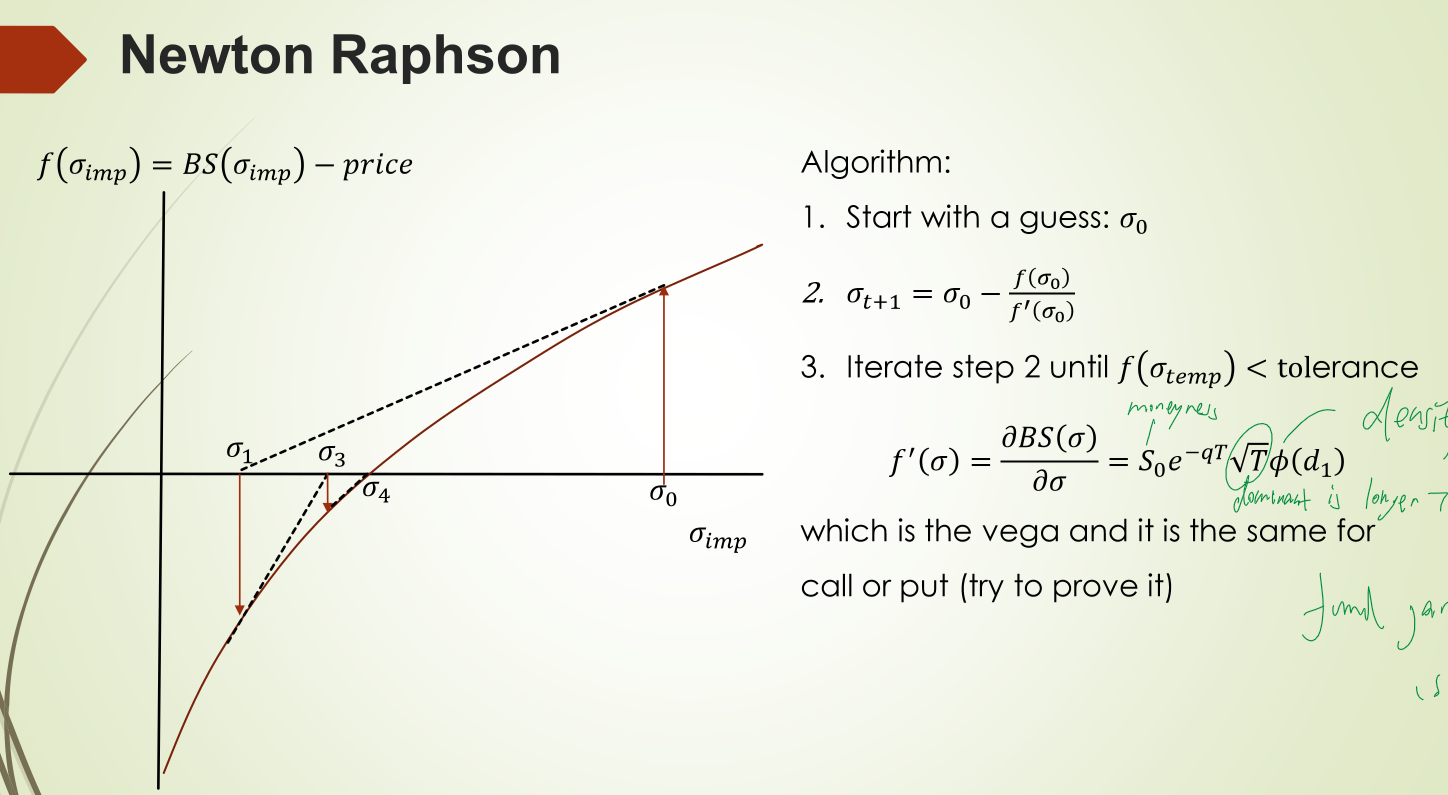

In [486]:
Image('newton raphson.PNG',width=500,height=500)

In [487]:
# define global variables

price = 3.839934576789126 # call price
tol = 0.0000001
S=100 # spot price
E=100 # strike price
T=0.25 #T=30/360 # time to expiration
r=0.02 # risk free rate
q = 0.03 # annual dividend yield
ctr = 0

# step 1 guess initial sigma_naught
i = 9
while abs(BSM(sigma=i)-price) > tol:
    ctr += 1
    d1 = (log(S/E)+T*(r-q+pow(i,2)/2)) / (i*sqrt(T))
    fprime = S*exp(-q*T)*sqrt(T)*stats.norm.cdf(d1)
    i = i - (BSM(sigma=i)-price)/fprime
    print(i)
    # for safe guard
    if ctr > 1000:
        break

call price: 96.8231
put price: 97.0716
call price: 96.8231
put price: 97.0716
7.103113992308521
call price: 91.7231
put price: 91.9715
call price: 91.7231
put price: 91.9715
5.262376511261604
call price: 80.5391
put price: 80.7875
call price: 80.5391
put price: 80.7875
3.555898853154282
call price: 62.0842
put price: 62.3326
call price: 62.0842
put price: 62.3326
2.1116028381339964
call price: 39.8684
put price: 40.1168
call price: 39.8684
put price: 40.1168
1.07505291600771
call price: 20.9328
put price: 21.1813
call price: 20.9328
put price: 21.1813
0.5049474442165726
call price: 9.8592
put price: 10.1077
call price: 9.8592
put price: 10.1077
0.28292475236386017
call price: 5.4804
put price: 5.7288
call price: 5.4804
put price: 5.7288
0.21949789095894012
call price: 4.2258
put price: 4.4742
call price: 4.2258
put price: 4.4742
0.20433542843555988
call price: 3.9257
put price: 4.1742
call price: 3.9257
put price: 4.1742
0.20094930556256319
call price: 3.8587
put price: 4.1072
call pri

3. Write a generic Binomial Tree Pricer so that it can take the input whether it is European
(isEuropean = True) or American (isEuropean = False), whether it is a call or put (IsCall =
True/False), S, K, r, q, T, sig, n (number of steps).

a. Price the same option as Q1 but change it to American option. You should get 3.8513883913821005  
b. Use the Binomial Tree for step size of 1 to 99 (Hint: np.arange) to find the difference between
the Binomial price vs the Black-Scholes theoretical European Call price as Q1 to produce the
chart as our last slide in Lecture 2. Hint: You will find list, map, lambda very useful, learn them!

Sample code: https://srdas.github.io/Papers/cython.pdf

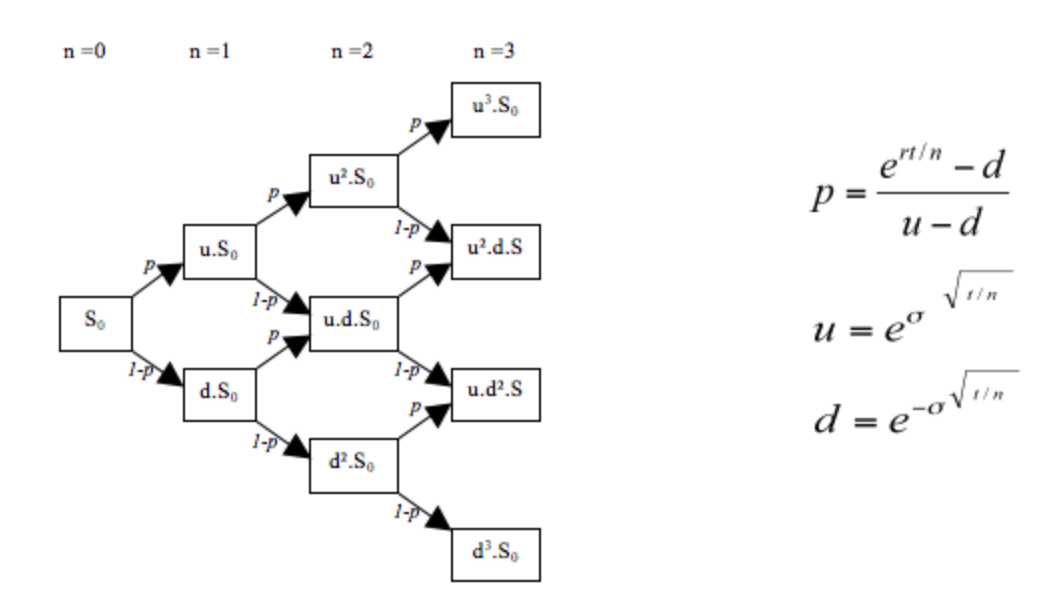

In [488]:
Image('binomialtree.PNG',width=500,height=500)

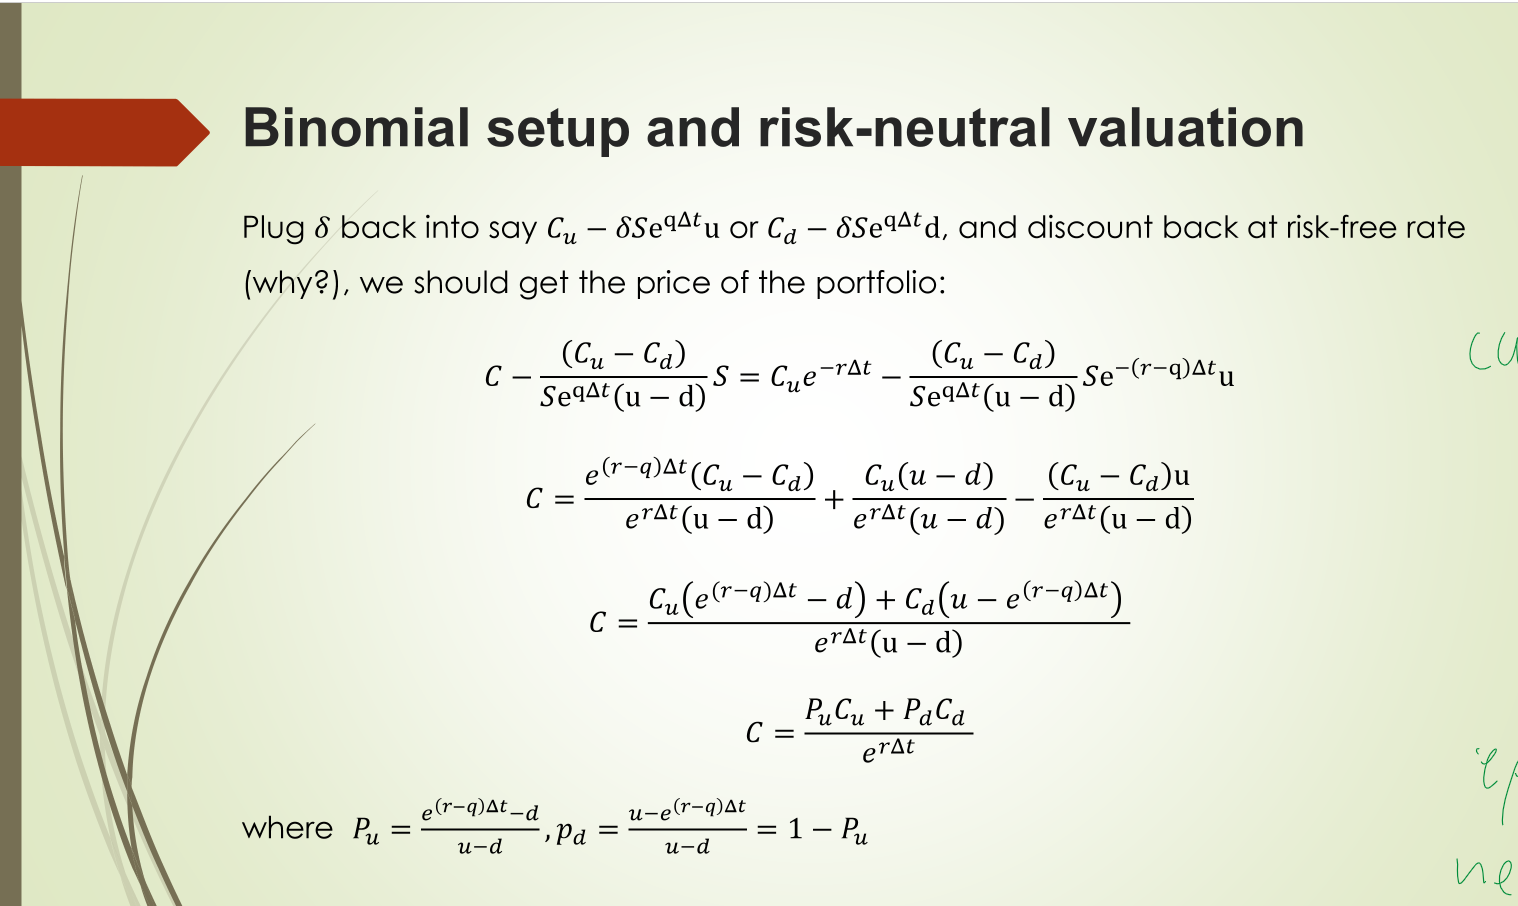

In [489]:
Image('binomialppt.PNG',width=500,height=500)

Assume stock returns follow log normal  

Max return would be $rmax_{t,t+h} = \sigma = \ln{S_{t+h}/S_t}$  
Then, $S_{t+h} = S_t * e^{\sigma}$ Then, $u = e^{\sigma}$

Min return would be $rmin_{t,t+h} = \sigma = \ln{S_{t}/S_{t+h}}$  
Then, $S_{t+h} = S_t / e^{\sigma}$ Then, $u = e^{-\sigma}$



$q = p = risk\ neutral\ probability= \frac{R/\theta-d}{u-d}=\frac{{\frac{e^{rh}}{e^{\delta h}}}-d}{u-d}$ R is the drift  

$E(p) = E(mx)\ where\ m=SDF $  

$NPV stock = \frac{p*u*S*e^{\delta h}+(1-p)*d*S*e^{\delta h}}{R}$  
$NPV option = \frac{p*Cu+(1-p)*Cd}{R}$  

$$Stock\ matrix$$
$$\begin{bmatrix} S & 0 & 0 & 0 \\ d & u & 0 & 0 \\ d & u & u & 0 \\ d&u&u&u \end{bmatrix}$$  
  
$$Option\ matrix$$
$$\begin{bmatrix} optionprice & 0 & 0 & 0 \\ npv1223 & npv2334 & 0 & 0 \\ npv12 & npv23 & npv34 & 0 \\
payoff1&payoff2&payoff3&payoff4 \end{bmatrix}$$  

In [490]:
def binomial_pricer(S=100,E=100,T=0.25,r=0.02,sigma=0.2,q=0.03,CP='C',AE='E',n=100,NP='P'):
    '''
    prices the binomial tree given n periods
    S=100 # spot price
    E=100 # strike price
    T=0.25 # T=30/360 # time to expiration
    r=0.02 # risk free rate annually
    sigma=0.2# volatility, or annual standard deviation
    q = 0.03 # annual dividend yield
    CP = C # 1 for call, -1 for put
    AE = E # 1 for american option, 0 for european option
    n =  # number of binomial steps
    h =  # binomial period
    u = # max total return for one period
    d = # min total return for one period
    p = risk neutral probability
    
    '''
# parameter calculations
    h = T/n if NP == 'P' else T/(n-1) if NP == 'N' else sys.exit("NP has to be N or P")
    u = exp(sigma*sqrt(h)) # derived above
    # u = exp((r-0.5*sigma**2)*h+sigma*sqrt(h))
    d = 1/u # derived above
    p = (exp((r-q)*h)-d) / (u-d) # risk neutral probability of up state
    drift = exp(r*h) # R
    CP = 1 if CP == 'C' else -1 if CP == 'P' else sys.exit("CP has to be C or P")
    AE = True if AE == 'A' else False if AE == 'E' else sys.exit("AE has to be A or E")
    

#  Create some empty matrices to hold our stock and call prices
    stock_prices = np.zeros((n,n)) # in ( ) is shape
    option_prices = np.zeros((n,n))
    # Fill stock prices matrix forward
    stock_prices[0,0] = S
    for i in range(1, n): # loop thru rows except the origin (0,0)
        stock_prices[i,0] = d*stock_prices[i-1,0] # vertical downward is downstate
        m = i + 1 # for every row there is always (the same row number of) columns to fill upstate as square matrix
        for j in range(1,m):
            stock_prices[i,j] = u*stock_prices[i-1, j-1] # diagonal downward is upstate
    #display(stock_prices)
    
 # Fill the option prices matrix backwards
    #  Set the last row of the call matrix to difference of strike price - stock price
    # If the call price is less than zero, then replace with zero
    option_prices[-1,:] =  np.where(CP*(stock_prices[-1,:]-E)<=0,0,CP*(stock_prices[-1,:]-E))
    #  Backpropagate option npv using above formula in markdown
    for i in range(n-2,-1,-1): # loop from 2nd last row to 0th row
        for j in range(i + 1): # loop thru all columns
            option_prices[i,j] = ((1-p)*option_prices[i+1,j]+p*option_prices[i+1,j+1]) / drift
            if AE:
                option_prices[i,j] = max(((1-p)*option_prices[i+1,j]+p*option_prices[i+1,j+1]) / drift,CP*(stock_prices[i,j]-E))
    #display(option_prices)
            
    return option_prices[0,0]
    
    


In [491]:
print('European Call')
display(binomial_pricer(CP='C', AE='E', n=100)) # should converge to 3.8399
print('European Put')
display(binomial_pricer(CP='P', AE='E', n=100)) # should converge to 4.0884
print('American Call')
display(binomial_pricer(CP='C', AE='A', n=100)) # should converge to 3.8513
print('American Put')
display(binomial_pricer(CP='P', AE='A', n=100)) 

European Call


3.831493674153691

European Put


4.077467058715789

American Call


3.8513883913821303

American Put


4.077467074728035

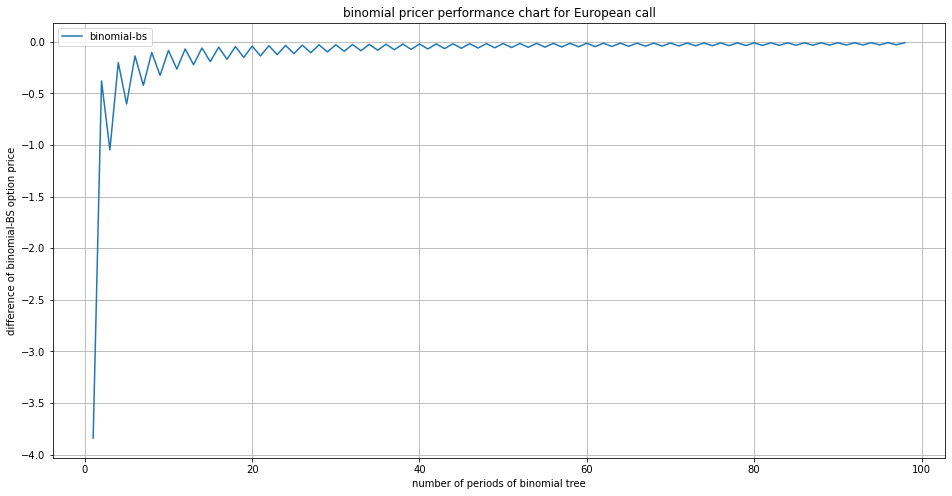

In [492]:
df = pd.DataFrame([],columns=['step','Binomial-BS'])
price = 3.839934576789126 # european call price in Q1
for i in np.arange(start=1,stop=99,step=1): # because h = T/n
    df = df.append(pd.Series((i,binomial_pricer(CP='C', AE='E', n=i)-price),index=df.columns),ignore_index=True)
    
plt.figure(figsize=(16,8))
plt.plot(df['step'],df['Binomial-BS'])
plt.legend(['binomial-bs'])
plt.title('binomial pricer performance chart for European call')
plt.xlabel('number of periods of binomial tree')
plt.ylabel('difference of binomial-BS option price')
plt.grid()


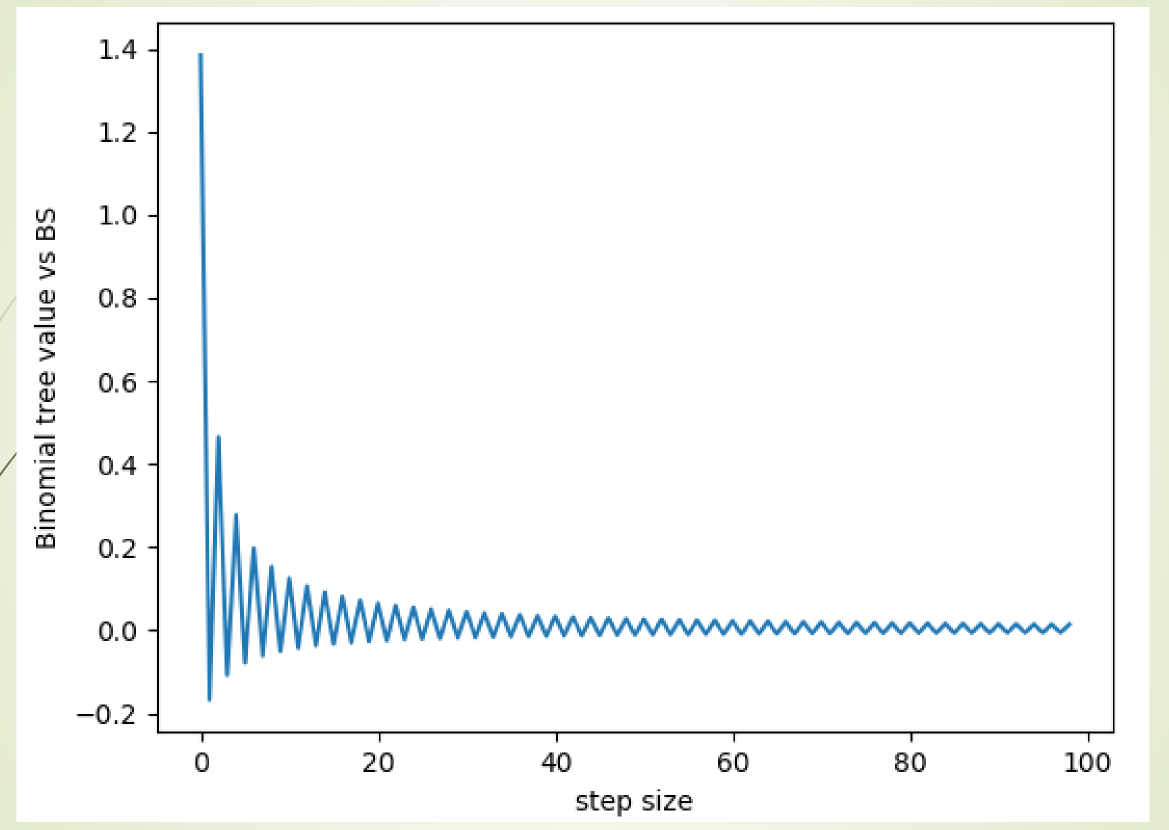

In [493]:
Image('binomialgraph.PNG',width=500,height=500)

Note even number steps have higher option valuation than odd number steps for ATM option because of the risk neutral pricing is discounted by drift.

When n = number nodes on the tree, binomial model is overvalued than bs model for even steps. But when n = steps/period on the tree, binomial model price is always lower than bs model.

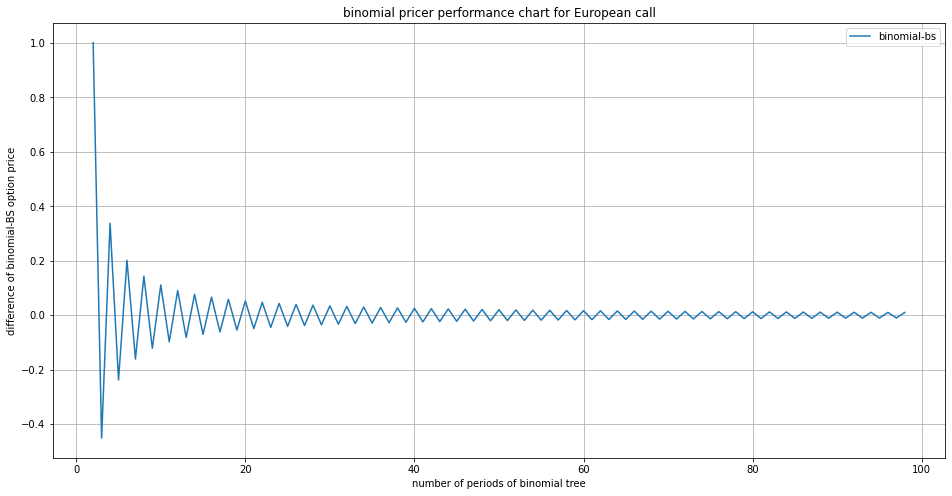

In [495]:
df = pd.DataFrame([],columns=['step','Binomial-BS'])
price = 3.839934576789126 # european call price in Q1
for i in np.arange(start=2,stop=99,step=1): # because h = T/(n-1)
    df = df.append(pd.Series((i,binomial_pricer(CP='C', AE='E', n=i,NP='N')-price),index=df.columns),ignore_index=True)
    
plt.figure(figsize=(16,8))
plt.plot(df['step'],df['Binomial-BS'])
plt.legend(['binomial-bs'])
plt.title('binomial pricer performance chart for European call')
plt.xlabel('number of periods of binomial tree')
plt.ylabel('difference of binomial-BS option price')
plt.grid()